In [723]:
import pandas as pd
import numpy as np
import polars as pl

In [724]:
games_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")
records_df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/standings.csv", index_col="team")[["season","pct"]].groupby(["team"])["pct"].mean()

weather_df = pd.read_csv(r'C:\Users\Mark\OneDrive - Atlantic TU\Documents\Data\weatherData.csv')#.groupby("month_number")

games_df["home_team_win_perecentage"] = games_df["home_team"].map(records_df)
games_df["away_team_win_perecentage"] = games_df["away_team"].map(records_df)

games_df["month_number"] = pd.to_numeric(games_df['gameday'].str[5:7])

phoenixList = ['ARI', 'LV', 'SD']
d1=dict.fromkeys(phoenixList, 'Phoenix')
columbusList = ['CIN', 'CLE', 'PIT']
d2=dict.fromkeys(columbusList, 'Columbus')
sacramentoList = ['LAR', 'LAC', 'LA', 'SF', 'OAK']
d3=dict.fromkeys(sacramentoList, 'Sacramento')
tallahasseeList = ['JAX', 'TB', 'MIA']
d4=dict.fromkeys(tallahasseeList, 'Tallahassee')
madisonList = ['GB','CHI']
d5=dict.fromkeys(madisonList, 'Madison')
topekaList = ['KC','STL']
d6=dict.fromkeys(topekaList, 'Topeka')
austinList = ['DAL','HOU']
d7=dict.fromkeys(austinList, 'Austin')
trentonList = ['PHI', 'NYJ', 'NYG']
d8=dict.fromkeys(trentonList, 'Trenton')

d = {**d1,**d2,**d3,**d4,**d5,**d6,**d7, **d8, "CAR": "Columbia", "TEN": "Nashville", "BAL": "Annapolis", "WAS": "Washington", "SEA": "Olympia", "DEN": "Denver", "NE": "Providence", "IND": "Indianapolis", "MIN": "Saint Paul", "DET": "Lansing", "BUF": "Albany", "ATL": "Atlanta", "NO": "Jackson"}
games_df['homeTeamNearestWeatherStation'] = games_df['home_team'].map(d)
games_df['awayTeamNearestWeatherStation'] = games_df['away_team'].map(d)

games_df = games_df.loc[games_df['gameday']<='2024-03-01']

In [725]:
weather_df['date']= pd.to_datetime(weather_df['date'])
january_weather_df = weather_df[weather_df['date'].dt.month == 1].groupby('city_name')['avg_temp_c'].mean()
february_weather_df = weather_df[weather_df['date'].dt.month == 2].groupby('city_name')['avg_temp_c'].mean()
september_weather_df = weather_df[weather_df['date'].dt.month == 9].groupby('city_name')['avg_temp_c'].mean()
october_weather_df = weather_df[weather_df['date'].dt.month == 10].groupby('city_name')['avg_temp_c'].mean()
november_weather_df = weather_df[weather_df['date'].dt.month == 11].groupby('city_name')['avg_temp_c'].mean()
december_weather_df = weather_df[weather_df['date'].dt.month == 12].groupby('city_name')['avg_temp_c'].mean()

games_df['avgHomeTeamJanTemp'] = games_df['homeTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamFebTemp'] = games_df['homeTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamSepTemp'] = games_df['homeTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamOctTemp'] = games_df['homeTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamNovTemp'] = games_df['homeTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgHomeTeamDecTemp'] = games_df['homeTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df['avgAwayTeamJanTemp'] = games_df['awayTeamNearestWeatherStation'].map(january_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamFebTemp'] = games_df['awayTeamNearestWeatherStation'].map(february_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamSepTemp'] = games_df['awayTeamNearestWeatherStation'].map(september_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamOctTemp'] = games_df['awayTeamNearestWeatherStation'].map(october_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamNovTemp'] = games_df['awayTeamNearestWeatherStation'].map(november_weather_df).apply(lambda x: (x * 1.8)+32)
games_df['avgAwayTeamDecTemp'] = games_df['awayTeamNearestWeatherStation'].map(december_weather_df).apply(lambda x: (x * 1.8)+32)

games_df.loc[games_df['month_number']== 1, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'homeAcclimatisedTemp' ] = games_df['avgHomeTeamDecTemp']

games_df.loc[games_df['month_number']== 1, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamJanTemp']
games_df.loc[games_df['month_number']== 2, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamFebTemp']
games_df.loc[games_df['month_number']== 9, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamSepTemp']
games_df.loc[games_df['month_number']== 10, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamOctTemp']
games_df.loc[games_df['month_number']== 11, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamNovTemp']
games_df.loc[games_df['month_number']== 12, 'awayAcclimatisedTemp' ] = games_df['avgAwayTeamDecTemp']

games_df['home_acclimitisation_advantage'] = (games_df['homeAcclimatisedTemp'] - games_df['temp'])-(games_df['awayAcclimatisedTemp']-games_df['temp'])
df = games_df

In [726]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(df.iloc[:, 26:40], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,div_game,roof,temp,wind,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0,dome,0.0,0.0,0.503437,0.519981,9,73.707500,63.875000,0.000000
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0,outdoors,80.0,12.0,0.462116,0.570173,9,61.655000,67.895000,-6.240000
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,1,outdoors,78.0,12.0,0.361333,0.627238,9,65.307826,65.307826,0.000000
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0,outdoors,67.0,10.0,0.614770,0.357639,9,61.655000,69.197391,-7.542391
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,1,dome,0.0,0.0,0.601023,0.491049,9,66.192500,63.560000,0.000000
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0,outdoors,76.0,8.0,0.387948,0.482177,9,79.760000,69.197391,10.562609
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,1,dome,0.0,0.0,0.569373,0.477382,9,70.212500,75.972500,0.000000
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,1,outdoors,73.0,5.0,0.423753,0.697570,9,70.347500,66.837500,3.510000
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,1,outdoors,75.0,3.0,0.578804,0.439898,9,70.347500,90.207500,-19.860000
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0,dome,0.0,0.0,0.573450,0.379236,9,59.240000,60.185000,0.000000


In [727]:
roofMap = {"dome":1, "outdoors":0, "closed":1, "open":0}
df['roof']= df['roof'].map(roofMap)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

In [728]:
df1 = df.iloc[6460]
df1

away_team                               LAC
away_score                             28.0
home_team                               MIN
home_score                             24.0
location                               Home
home_winning_margin                    -4.0
total                                  52.0
overtime                                0.0
away_rest                                 7
home_rest                                10
away_moneyline                       -110.0
home_moneyline                       -110.0
spread_line                             1.0
away_spread_odds                     -115.0
home_spread_odds                     -105.0
total_line                             54.0
under_odds                           -110.0
over_odds                            -110.0
div_game                                  0
indoor_game                               1
temp                                    0.0
wind                                    0.0
home_team_win_perecentage       

In [729]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,20.873993,23.234566,2.360573,44.108559,0.061288,7.472413,7.522070,59.315240,-92.468983,2.313451,...,0.500917,9.866239,53.144501,53.143450,-0.193075,0.565016,0.483895,0.649866,0.474650,0.047122
std,10.065753,10.316932,14.616551,14.208215,0.239876,1.976951,2.098159,244.880739,281.343748,5.962331,...,0.082819,2.753860,14.551758,14.482275,9.967743,0.495792,0.499778,13.463998,0.499394,13.263428
min,0.000000,0.000000,-49.000000,3.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,0.357639,1.000000,17.225600,17.225600,-36.007200,0.000000,0.000000,-39.500000,0.000000,-52.000000
25%,14.000000,16.000000,-7.000000,34.000000,0.000000,7.000000,7.000000,-104.000000,-210.000000,-3.000000,...,0.439898,9.000000,42.582500,42.582500,-4.383499,0.000000,0.000000,-9.000000,0.000000,-8.500000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,0.491049,10.000000,53.652500,53.652500,0.000000,1.000000,0.000000,-0.500000,0.000000,0.000000
75%,27.000000,30.000000,11.000000,53.000000,0.000000,7.000000,7.000000,187.750000,0.000000,6.500000,...,0.570173,12.000000,64.737500,64.737500,4.042500,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,0.697570,12.000000,90.207500,90.207500,35.184000,1.000000,1.000000,68.500000,1.000000,49.500000


In [730]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6706,6706,6706
unique,35,35,2
top,BAL,NE,Home
freq,222,231,6627


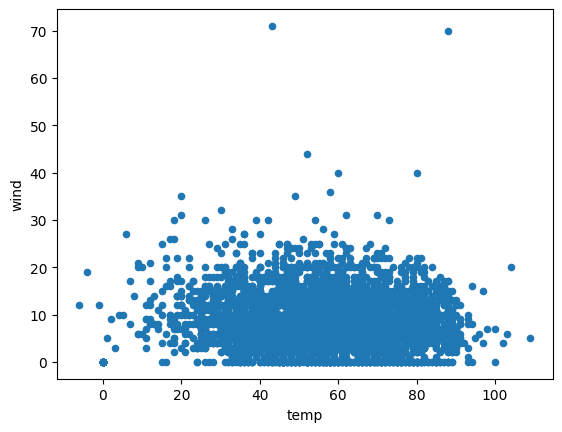

In [731]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [732]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.519981,9,73.7075,63.8750,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.491049,9,66.1925,63.5600,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.477382,9,70.2125,75.9725,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.379236,9,59.2400,60.1850,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,0.587436,9,67.8950,69.2600,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6693,CLE,14.0,HOU,45.0,Home,31.0,59.0,0.0,6,7,...,0.361333,1,51.6488,28.5440,0.0,1,1,14.0,1,33.5
6695,GB,48.0,DAL,32.0,Home,-16.0,80.0,0.0,7,7,...,0.614770,1,51.6488,21.0200,0.0,0,1,27.5,0,-23.0
6696,LA,23.0,DET,24.0,Home,1.0,47.0,0.0,7,7,...,0.558415,1,23.5025,46.0472,0.0,1,0,-5.5,0,-2.5
6701,TB,23.0,DET,31.0,Home,8.0,54.0,0.0,6,7,...,0.451726,1,23.5025,50.8064,0.0,1,1,4.5,1,2.0


In [733]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0.570173,9,61.655000,67.895000,-6.240000,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,0.627238,9,65.307826,65.307826,0.000000,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0.357639,9,61.655000,69.197391,-7.542391,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0.482177,9,79.760000,69.197391,10.562609,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,0.697570,9,70.347500,66.837500,3.510000,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,HOU,10.0,BAL,34.0,Home,24.0,44.0,0.0,7,14,...,0.433344,1,33.915200,51.648800,-17.733600,1,0,0.0,1,14.0
6700,GB,21.0,SF,24.0,Home,3.0,45.0,0.0,6,13,...,0.614770,1,46.047200,21.020000,25.027200,1,0,-5.5,0,-7.5
6702,KC,27.0,BUF,24.0,Home,-3.0,51.0,0.0,8,6,...,0.570173,1,21.214400,31.020800,-9.806400,0,1,5.5,0,-5.5
6703,KC,17.0,BAL,10.0,Home,-7.0,27.0,0.0,7,8,...,0.570173,1,33.915200,31.020800,2.894400,0,0,-17.0,0,-11.5


In [734]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [735]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [736]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [737]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\2317046437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number']] = \


In [738]:
# removed temp and wind columns as they are irrelant for indoor games
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_22648\2213099128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin','home_team_win_perecentage','away_team_win_perecentage','month_number','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage']] = \


In [739]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.2)

In [740]:
from sklearn.model_selection import train_test_split

outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_train, outdoor_with_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)
outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_train, outdoor_without_acclimitisation_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game','homeAcclimatisedTemp','awayAcclimatisedTemp','home_acclimitisation_advantage'], axis=1), outdoor_df['over_totals_win'], test_size=0.2)

In [741]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
4106,26,7,0,-0.856634,-0.264164,-0.214139,-0.224350,-0.711982,0.726465,-0.651470,...,-0.763072,-0.756555,1.025467,0.424244,59.712174,49.055000,0.0,-1.123936,-0.961954,-0.637404
1913,15,0,0,-0.366211,-0.264164,-0.214139,-0.224350,-1.039625,1.014050,-0.987732,...,-0.763072,-0.672811,0.915593,0.077639,78.740000,56.315000,0.0,-1.123936,1.039551,0.049428
448,29,1,0,-1.557238,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,-0.399273,...,-0.763072,0.139096,0.957305,0.770849,47.165000,39.419130,0.0,-1.123936,-0.961954,-1.515023
476,3,8,0,1.525419,-0.264164,0.287267,0.246062,-0.239180,0.341772,0.609515,...,1.310493,1.386062,-0.091582,0.770849,33.890000,30.897500,0.0,0.889731,1.039551,1.384936
4729,14,7,0,-0.085969,-0.264164,-0.214139,-0.224350,0.449285,-0.349180,0.189186,...,1.310493,-0.756555,-1.403963,0.770849,54.230000,56.930000,0.0,0.889731,-0.961954,-0.179516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,2,15,0,-1.136875,-0.264164,1.791484,0.246062,-0.753456,0.760079,-0.567404,...,-0.763072,0.981640,1.135340,0.424244,48.395000,47.885000,0.0,-1.123936,-0.961954,-0.980820
6398,12,8,0,-0.226090,-0.264164,-0.214139,-0.224350,0.291685,-0.188580,0.105121,...,1.310493,1.386062,-0.826109,-3.041804,27.802400,51.648800,0.0,-1.123936,-0.961954,-0.293988
5370,25,8,0,-0.646453,-0.264164,-0.214139,-0.224350,0.640065,-0.562068,0.525449,...,-0.763072,1.386062,-1.789764,-0.268965,66.192500,69.197391,0.0,-1.123936,-0.961954,-0.942663
1880,14,8,0,0.334393,-0.264164,-0.715544,-0.224350,-0.239180,0.341772,0.693580,...,1.310493,1.386062,-1.403963,-0.268965,66.192500,79.760000,0.0,0.889731,1.039551,0.049428


In [742]:
indoor_X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.080301,0.018233,-0.063391,0.011438,-0.012175,0.001382,0.004250,-0.008922,-0.058459,...,0.023387,0.016775,-0.012384,0.006218,0.050080,0.051447,NaN,-0.063247,-0.034380,-0.042211
home_team,-0.080301,1.000000,0.027369,0.053998,-0.005686,0.040807,0.030476,-0.004190,0.015238,0.121392,...,0.007075,0.039270,-0.036117,0.006064,-0.252142,0.024609,NaN,0.036974,-0.003903,0.003032
location,0.018233,0.027369,1.000000,-0.029915,0.052373,0.224430,0.212566,0.009075,-0.001671,-0.032507,...,-0.060481,0.097431,0.002537,-0.177614,-0.130175,-0.102870,NaN,-0.060710,-0.028749,-0.017658
home_winning_margin,-0.063391,0.053998,-0.029915,1.000000,-0.038350,0.009744,0.034844,0.316635,-0.304017,0.398556,...,-0.003959,0.134549,-0.126923,-0.021903,-0.025506,0.029131,NaN,0.777166,0.683534,0.906701
overtime,0.011438,-0.005686,0.052373,-0.038350,1.000000,0.015854,0.023082,0.012845,-0.003145,-0.003891,...,0.018071,0.001814,0.037128,-0.068904,0.051124,0.019838,NaN,-0.010813,-0.075959,-0.040011
away_rest,-0.012175,0.040807,0.224430,0.009744,0.015854,1.000000,0.301729,0.023693,-0.018254,0.029455,...,-0.055561,0.100783,-0.008673,-0.025002,-0.001263,0.010166,NaN,0.024063,0.013337,-0.002925
home_rest,0.001382,0.030476,0.212566,0.034844,0.023082,0.301729,1.000000,0.071618,-0.061544,0.093561,...,-0.074056,0.068354,0.034467,-0.137818,-0.043954,0.002635,NaN,0.026776,-0.004866,-0.005047
away_moneyline,0.004250,-0.004190,0.009075,0.316635,0.012845,0.023693,0.071618,1.000000,-0.971947,0.822227,...,-0.019566,0.278130,-0.262826,-0.045517,0.025022,0.038265,NaN,0.309324,-0.074029,-0.032995
home_moneyline,-0.008922,0.015238,-0.001671,-0.304017,-0.003145,-0.018254,-0.061544,-0.971947,1.000000,-0.782599,...,0.026254,-0.261763,0.251575,0.035005,-0.036293,-0.035687,NaN,-0.290854,0.058781,0.028524
spread_line,-0.058459,0.121392,-0.032507,0.398556,-0.003891,0.029455,0.093561,0.822227,-0.782599,1.000000,...,0.002084,0.277658,-0.253943,-0.046625,-0.014428,0.061025,NaN,0.360335,-0.071053,-0.025456


In [743]:
indoor_y_train

4106    1
1913    1
448     0
476     1
4729    1
       ..
6272    0
6398    1
5370    1
1880    0
3806    1
Name: over_totals_win, Length: 1300, dtype: int32

In [744]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,div_game,home_team_win_perecentage,away_team_win_perecentage,month_number,homeAcclimatisedTemp,awayAcclimatisedTemp,home_acclimitisation_advantage,home_win,home_spread_win,home_spread_winning_margin
5455,1,15,0,-1.347056,-0.264164,3.295700,3.068535,1.846953,-2.082163,1.954564,...,1.310493,0.981640,0.066107,0.424244,48.395000,52.1450,0.0,-1.123936,-0.961954,-2.354485
1241,32,15,0,-0.646453,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.105121,...,1.310493,0.981640,-0.592118,0.770849,44.826957,56.9300,0.0,-1.123936,-0.961954,-0.751876
1878,11,5,0,-0.646453,-0.264164,-0.214139,-0.224350,-0.239180,0.341772,0.693580,...,1.310493,-1.447952,1.483274,-0.268965,60.185000,61.6550,0.0,-1.123936,-0.961954,-1.018977
5788,34,19,1,-0.716513,-0.264164,-0.715544,-0.694763,0.316569,-0.214724,0.105121,...,-0.763072,-0.132561,-1.158782,0.770849,46.880000,42.5825,0.0,-1.123936,-0.961954,-0.828191
1962,1,5,0,0.964936,-0.264164,-0.214139,3.068535,-1.205520,1.137301,-1.239929,...,-0.763072,-1.447952,0.066107,0.424244,39.680000,52.1450,0.0,0.889731,1.039551,1.613880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3453,14,13,0,0.054151,3.785524,-0.214139,-0.224350,0.482464,-0.382794,0.189186,...,-0.763072,0.350498,-1.403963,-0.268965,63.875000,79.7600,0.0,0.889731,-0.961954,-0.026886
2233,14,15,0,1.034997,-0.264164,-0.214139,-0.224350,0.511496,-0.382794,0.189186,...,-0.763072,0.981640,-1.403963,0.424244,48.395000,59.4275,0.0,0.889731,1.039551,1.041520
2947,8,7,0,-1.136875,-0.264164,-0.214139,-0.224350,0.254358,-0.147497,-0.147076,...,-0.763072,-0.756555,0.779268,-0.268965,80.495000,80.4950,0.0,-1.123936,-0.961954,-1.171607
3126,14,8,0,0.544574,-0.264164,-0.214139,1.186886,0.569559,-0.472431,0.273252,...,1.310493,1.386062,-1.403963,0.770849,33.890000,56.9300,0.0,0.889731,1.039551,0.469159


In [745]:
indoor_y_test

5455    0
1241    0
1878    1
5788    0
1962    0
       ..
3453    1
2233    1
2947    0
3126    1
4516    1
Name: over_totals_win, Length: 325, dtype: int32

In [746]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression(max_iter=1000)
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

0.52


In [747]:
from sklearn.linear_model import LogisticRegression

outdoor_with_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_with_acclimitisation_model.fit(outdoor_with_acclimitisation_X_train, outdoor_with_acclimitisation_y_train)
print(outdoor_with_acclimitisation_model.score(outdoor_with_acclimitisation_X_test, outdoor_with_acclimitisation_y_test)) 

0.5496558505408063


In [748]:
outdoor_without_acclimitisation_model = LogisticRegression(max_iter=1000)
outdoor_without_acclimitisation_model.fit(outdoor_without_acclimitisation_X_train, outdoor_without_acclimitisation_y_train)
print(outdoor_without_acclimitisation_model.score(outdoor_without_acclimitisation_X_test, outdoor_without_acclimitisation_y_test)) 

0.5467059980334317


In [749]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_with_acclimitisation_y_pred = outdoor_with_acclimitisation_model.predict(outdoor_with_acclimitisation_X_test)
outdoor_without_acclimitisation_y_pred = outdoor_without_acclimitisation_model.predict(outdoor_without_acclimitisation_X_test)

print(tabulate(
    [
        ['Indoor', 
         round(accuracy_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(f1_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(precision_score(indoor_y_test, indoor_y_pred)*100, 1), 
         round(recall_score(indoor_y_test, indoor_y_pred)*100, 1)], 

        ['Outdoor with acclimitisation', 
         round(accuracy_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_with_acclimitisation_y_test, outdoor_with_acclimitisation_y_pred)*100, 1)],

        ['Outdoor without acclimitisation', 
         round(accuracy_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(f1_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(precision_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1), 
         round(recall_score(outdoor_without_acclimitisation_y_test, outdoor_without_acclimitisation_y_pred)*100, 1)]

    ], headers=['Model', 'Accuracy score', 'F1 score', 'Precision score', 'Recall score'], tablefmt='grid'
))


+---------------------------------+------------------+------------+-------------------+----------------+
| Model                           |   Accuracy score |   F1 score |   Precision score |   Recall score |
+=================================+==================+============+===================+================+
| Indoor                          |             52   |       56.4 |              50.8 |           63.5 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor with acclimitisation    |             55   |       44.1 |              49.9 |           39.6 |
+---------------------------------+------------------+------------+-------------------+----------------+
| Outdoor without acclimitisation |             54.7 |       42.4 |              48.3 |           37.9 |
+---------------------------------+------------------+------------+-------------------+----------------+
